<a href="https://colab.research.google.com/github/Kristina140699/DataScienceProjects/blob/main/Advanced/Data_Analysis_of_Amazon_top_50_selling_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project on analysing the data of Amazon top 50 selling books 2009 to 2019

The dataset is taken from kaggle.com the link to the same is embedded here:
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

This Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads




**Features of the dataset**

Name: Name of the Books | Data_type: String

Author: The author of the Book | Data_type: String

User Rating: Amazon Uusers Ratings out of 5 | Data_type: Float

Reviews: Number of written reviews/ feedbacks on amazon | Data_type: Float

Price: The price of the book (As at 13/10/2020) | Data_type: Float

Year: The year(s) the book is ranked as the bestseller | Data_type: Date

Gener: Whether fiction or non-fiction. | Data_type: String


In [1]:
from google.colab import drive #mounting my G-drive to G-colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Learning..../Data/Project /bestsellers with categories.csv")

In [8]:
data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [6]:
data.shape

(550, 7)

In [7]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [9]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [27]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [12]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

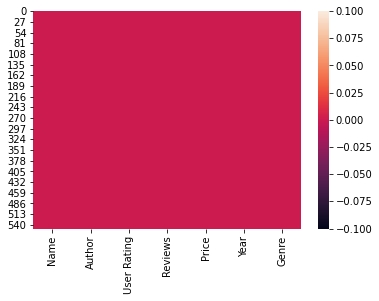

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull())
plt.show()

In [14]:
data.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

#Outlier Detection and treatment

Outliers are extreme values that deviate from other observations on data, they may indicate a variability in a measurement, experimental errors or a novelty.

Boxplots are a great way of detecting outliers. Once the outliers have been detected, they can then be imputed with the 5th and 95th percentiles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


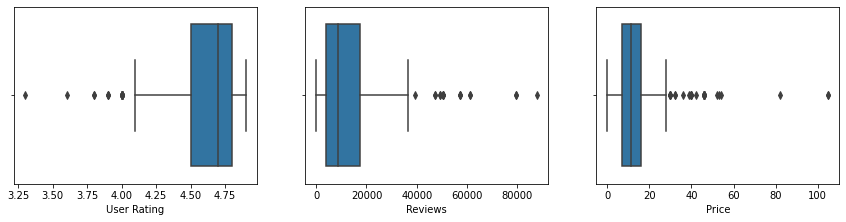

In [15]:
plt.figure(figsize=(20, 15))

plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

These lower level and upper level outliers will be replaced by the 5th and 95th percentiles.

# **Handling Outliers with numpy.clip()**
#numpy.clip() function is used to Clip (limit) the values in an array.

**Syntax:** numpy.clip(a, a_min, a_max, out= None)

**Parameters:**

a: Array containing elements to clip.

a_min: Minimum value.

a_max: Maximum value.

-> *If None, clipping is not performed on lower interval edge. Not more than one of a_min and a_max may be None.*





In [17]:
data['User Rating']= data['User Rating'].clip(lower=data['User Rating'].quantile(0.05), upper=data['User Rating'].quantile(0.95))

In [18]:
data['Reviews']= data['Reviews'].clip(lower=data['Reviews'].quantile(0.05), upper=data['Reviews'].quantile(0.95))

In [16]:
data['Price']= data['Price'].clip(lower=data['Price'].quantile(0.05), upper=data['Price'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


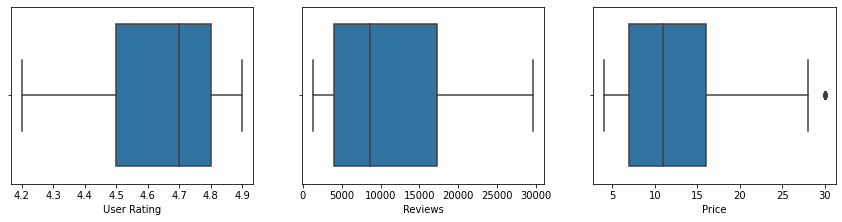

In [19]:
plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

> All outliers are removed now

#Explore trend over year for each gener:

Number of best-selling books in each gener each year

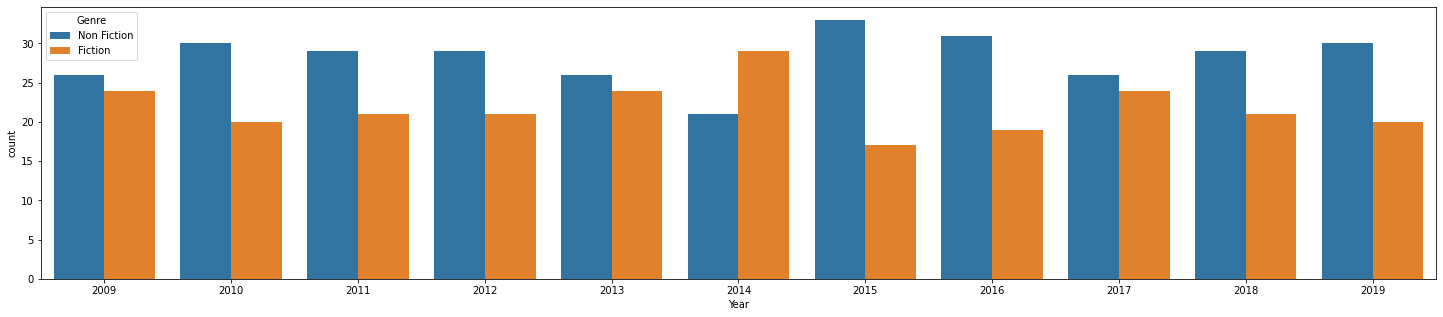

In [23]:
plt.figure(figsize=(25,5))
sns.countplot(x='Year', data=data, hue='Genre')

In [43]:
import plotly.express as px
from plotly.offline import init_notebook_mode
pie_data = data.Genre.value_counts().reset_index()

pie_data.columns = ['Genre','count']
fig = px.pie(pie_data, values='count', names='Genre', title='Proportion of books in different Genres')
fig.show()

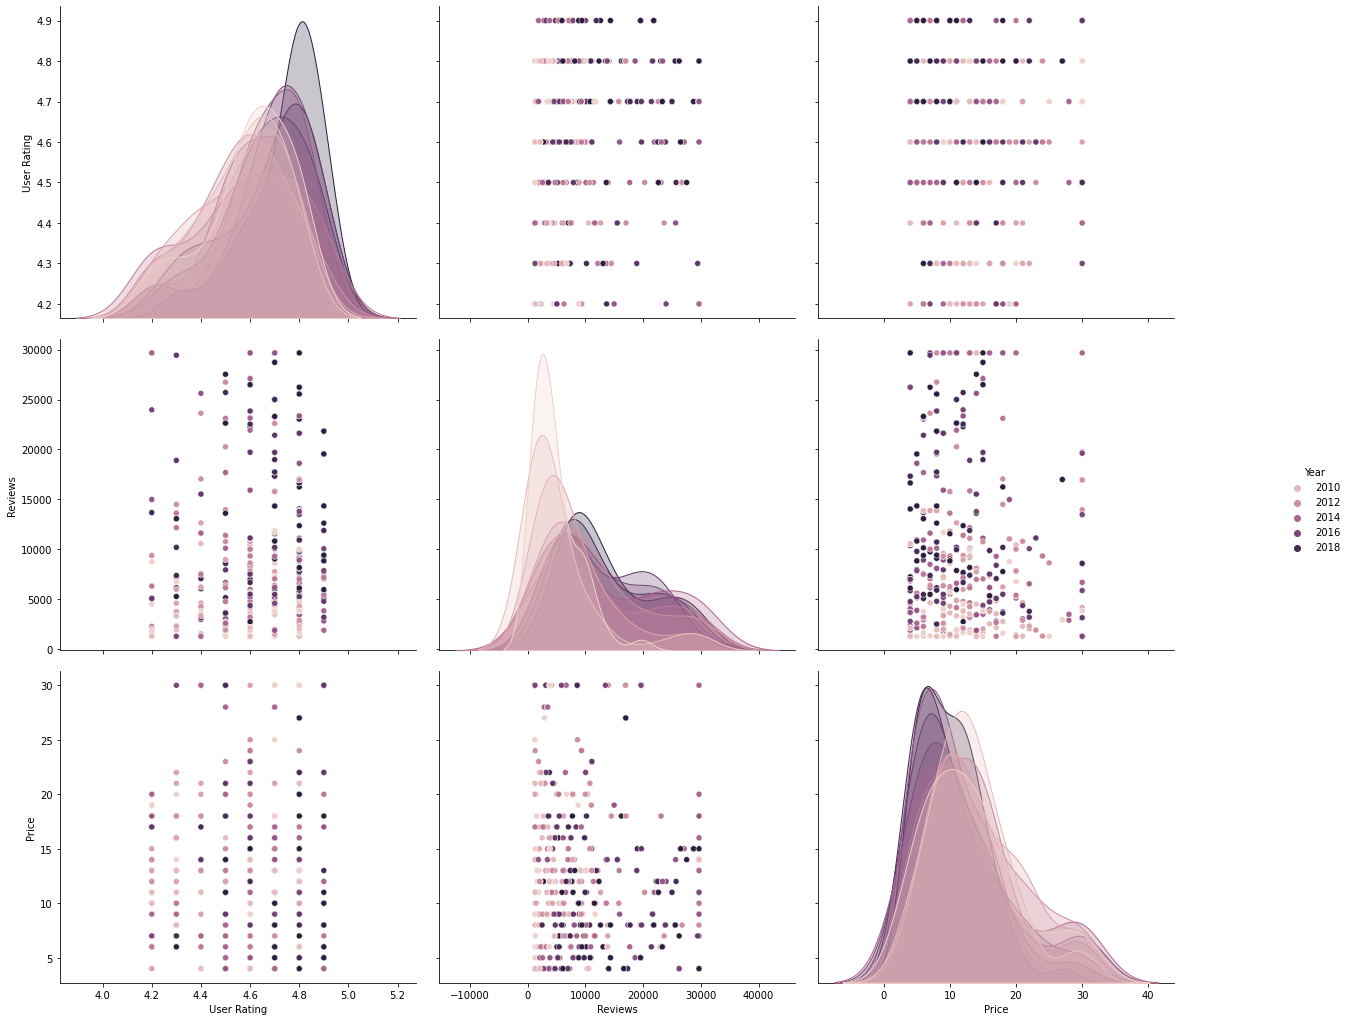

In [31]:
y= sns.pairplot(data,diag_kind='kde', hue='Year')
y.fig.set_size_inches(20,15)

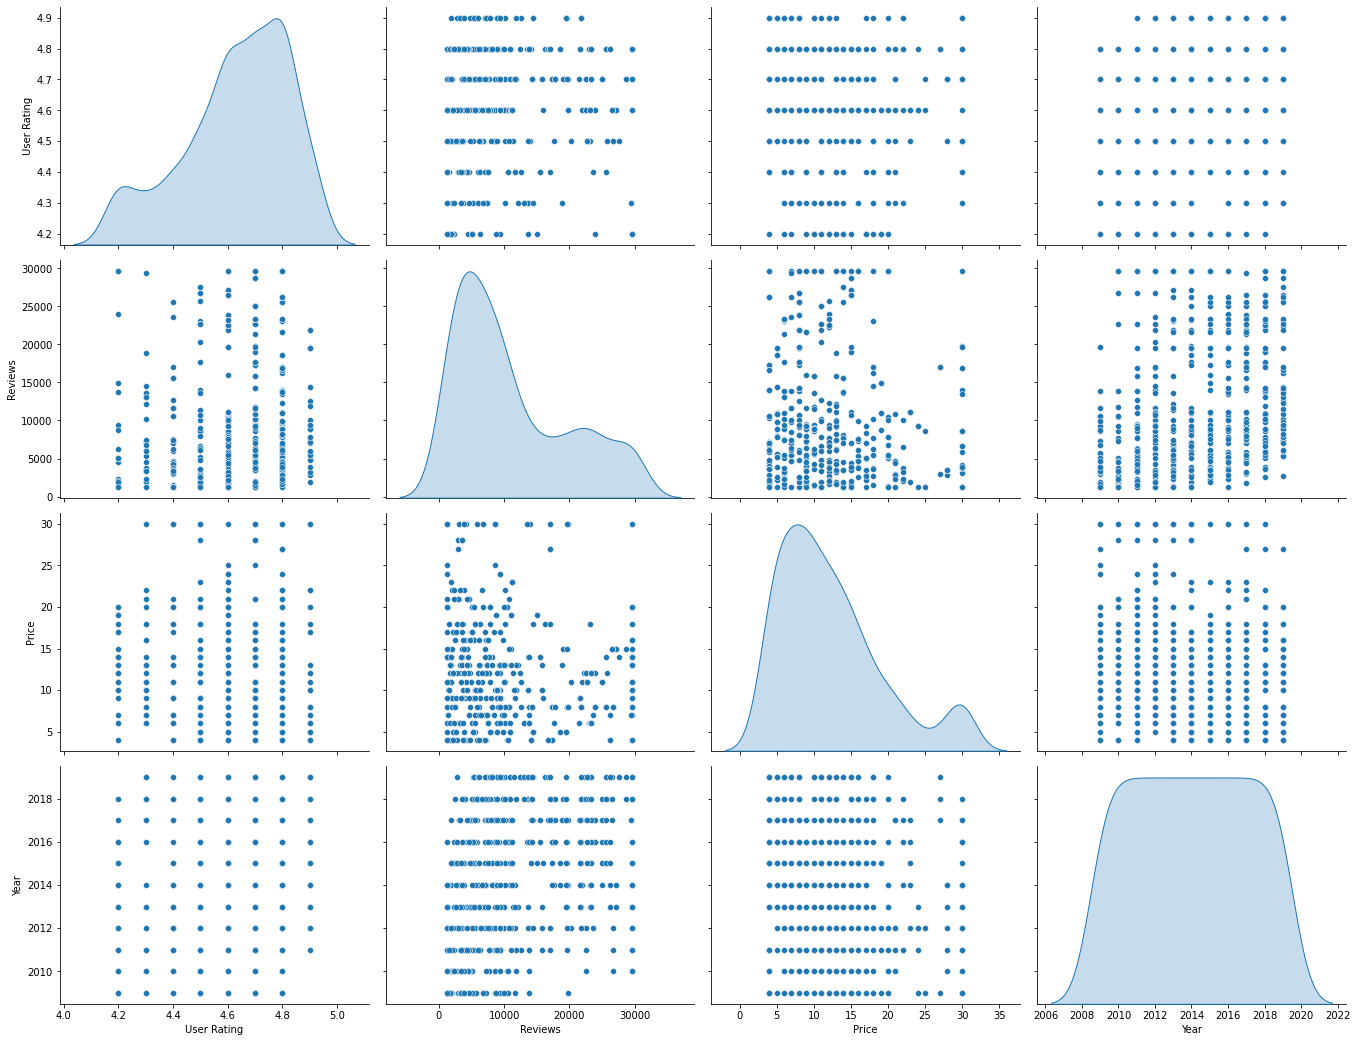

In [77]:
y= sns.pairplot(data,diag_kind='kde')
y.fig.set_size_inches(20,15)

#Finding the bestseller Author in the highest demand


In [82]:
A_demand= data[["Author", "User Rating", "Price", "Reviews", "Genre"]]
A_demand.value_counts()

Author                              User Rating  Price  Reviews   Genre      
American Psychological Association  4.5          30     8580.00   Non Fiction    10
Gallup                              4.2          17     5069.00   Non Fiction     9
Dr. Seuss                           4.9          8      21834.00  Fiction         8
Eric Carle                          4.9          5      19546.00  Fiction         7
Sarah Young                         4.9          8      19576.00  Non Fiction     6
                                                                                 ..
Joanna Gaines                       4.8          16     9867.00   Non Fiction     1
Stephen Kendrick                    4.8          13     1655.00   Non Fiction     1
Jill Twiss                          4.9          13     11881.00  Fiction         1
Stephen King                        4.3          20     6740.00   Fiction         1
Zhi Gang Sha                        4.6          17     1278.95   Non Fiction     

In [117]:
A= A_demand.sort_values(by=["User Rating"], ascending=False)
A

,Author,User Rating,Price,Reviews,Genre
431,Chip Gaines,4.9,5,7861.0,Non Fiction
87,Dav Pilkey,4.9,6,5470.0,Fiction
85,Dav Pilkey,4.9,8,12619.0,Fiction
84,Dav Pilkey,4.9,4,7235.0,Fiction
83,Dav Pilkey,4.9,4,7235.0,Fiction
...,...,...,...,...,...
22,Veronica Roth,4.2,13,6310.0,Fiction
309,Gallup,4.2,17,5069.0,Non Fiction
363,Pierre Dukan,4.2,15,2023.0,Non Fiction
364,Muriel Barbery,4.2,11,1859.0,Fiction


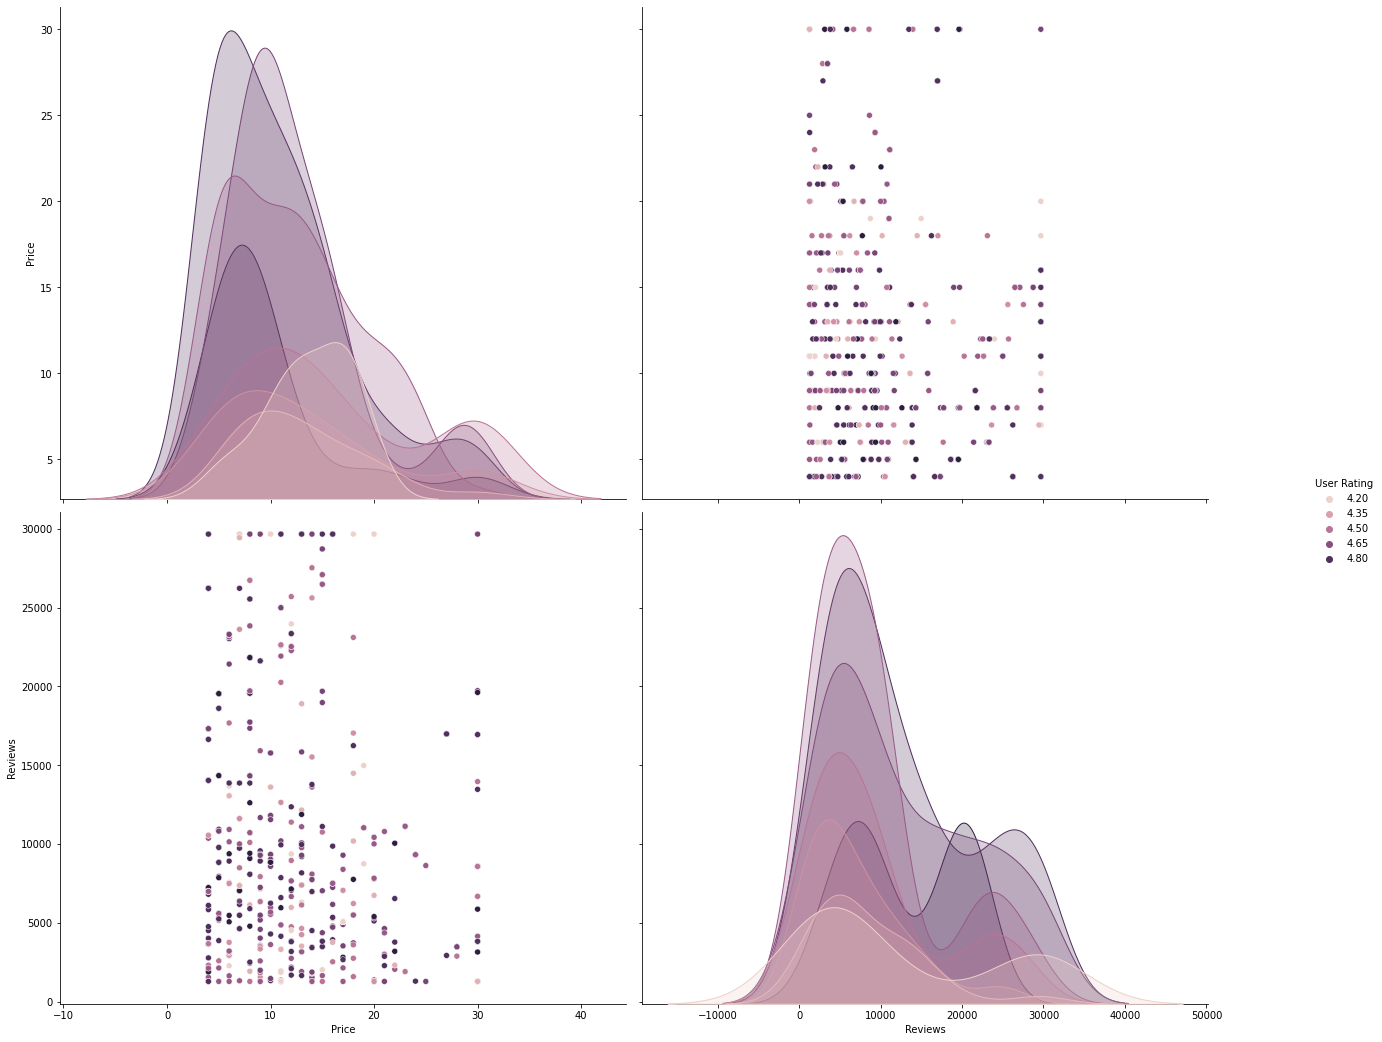

In [83]:
#Analysing the User Rating availavble for the bestseller Authors
ur=sns.pairplot(A_demand,diag_kind='kde', hue='User Rating', height=5)
ur.fig.set_size_inches(20,15)

#Since the User Rating of a book defines the quality of the book so ploting Authors against the User Rating for thier books will give us which bestseller author's writting is liked by most people!!





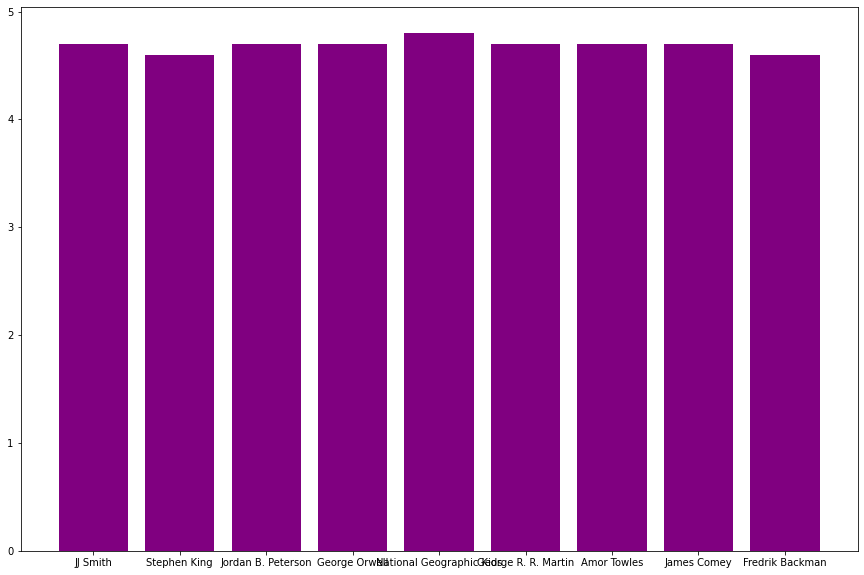

In [103]:
plt.figure(figsize=(15,10))
plt.bar(list(A_demand['Author'])[0:10],list(A_demand['User Rating'])[0:10],color="purple")
plt.show() #which bestseller author has written the best quality book

#Finding which bestseller book is in the highest demand

In [112]:
book_demand= data[["Name", "User Rating", "Price", "Reviews", "Genre"]]
book_demand.value_counts()

Name                                                                                                              User Rating  Price  Reviews  Genre      
Publication Manual of the American Psychological Association, 6th Edition                                         4.5          30     8580.0   Non Fiction    10
StrengthsFinder 2.0                                                                                               4.2          17     5069.0   Non Fiction     9
Oh, the Places You'll Go!                                                                                         4.9          8      21834.0  Fiction         8
The Very Hungry Caterpillar                                                                                       4.9          5      19546.0  Fiction         7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                                         4.9          8      19576.0  Non Fiction     6
                                        

In [108]:
book_demand = book_demand.sort_values(by=["Reviews"], ascending=False)
book_demand

,Name,User Rating,Price,Reviews,Genre
407,The Hunger Games,4.7,14,29673.00,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,4.2,20,29673.00,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,4.2,14,29673.00,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,4.2,14,29673.00,Fiction
534,Where the Crawdads Sing,4.8,15,29673.00,Fiction
...,...,...,...,...,...
439,The Official SAT Study Guide,4.4,30,1278.95,Non Fiction
299,Sookie Stackhouse,4.7,25,1278.95,Fiction
117,"Game Change: Obama and the Clintons, McCain an...",4.4,9,1278.95,Non Fiction
121,George Washington's Sacred Fire,4.5,20,1278.95,Non Fiction


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



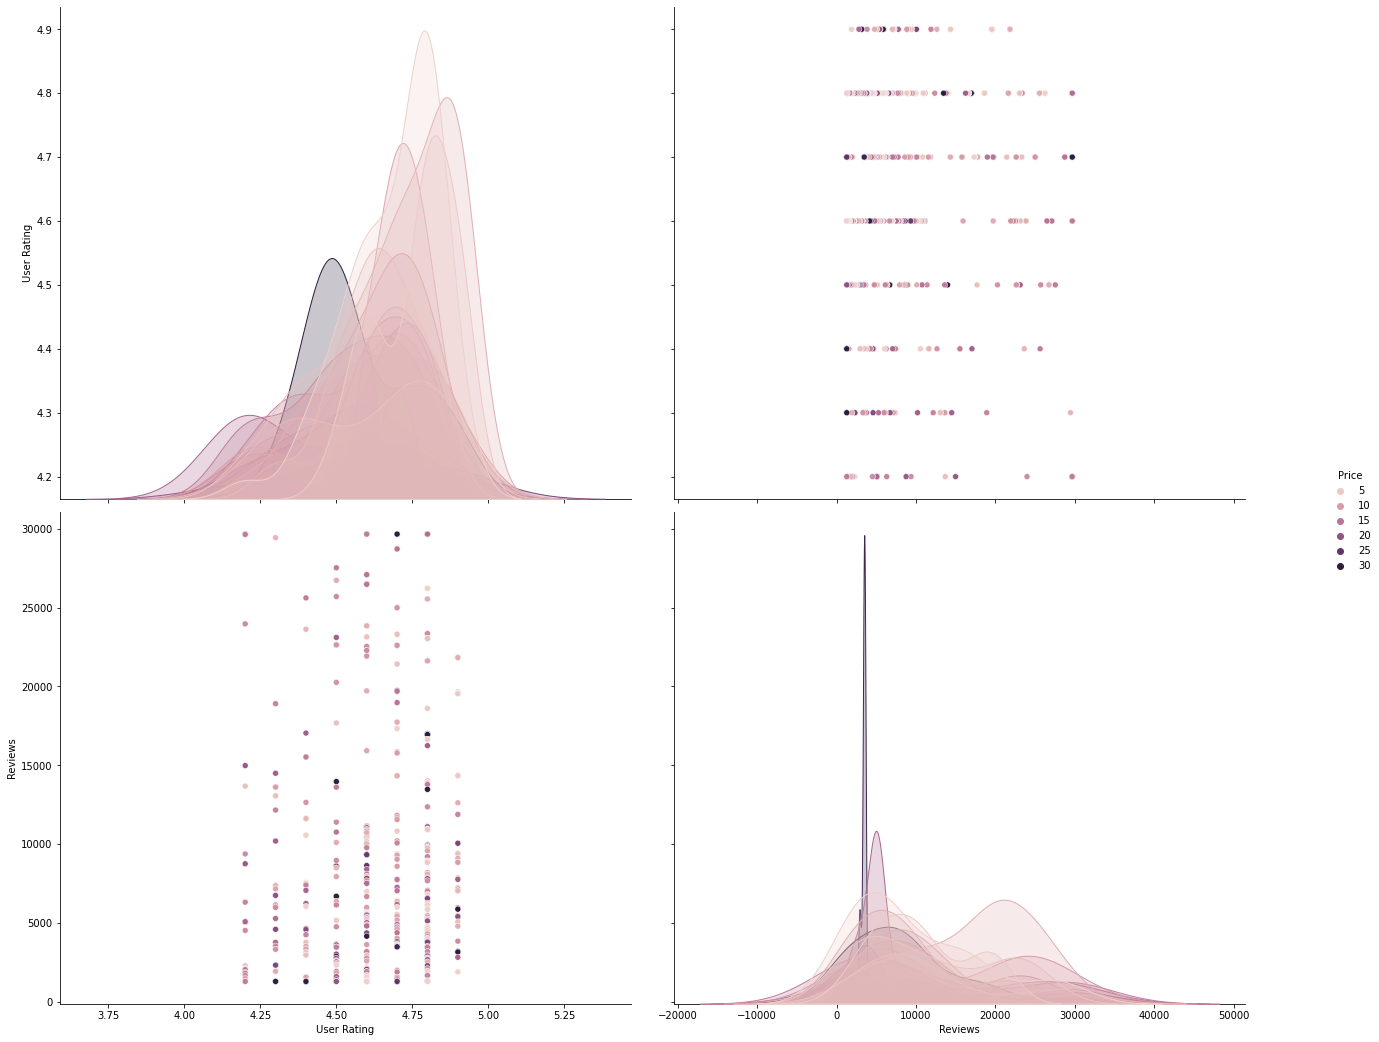

In [109]:
#Analysing the prices availavble for the bestseller books
p=sns.pairplot(book_demand,diag_kind='kde', hue='Price', height=5)
p.fig.set_size_inches(20,15)

#Since the Reviews are generally written by those people who have actually bought the book and read it, so ploting Book Names against the number of reviews the books will give us which bestseller book had the  highest sell!!

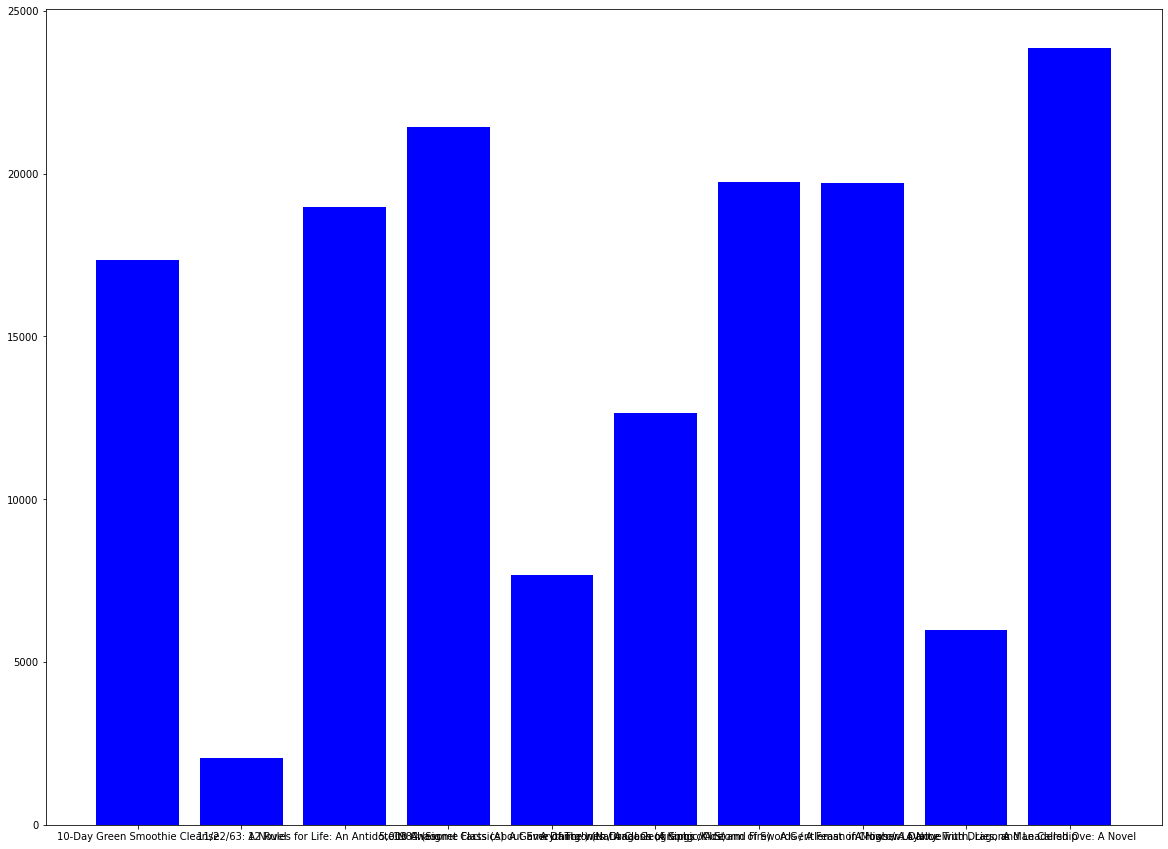

In [116]:
plt.figure(figsize=(20,15))
plt.bar(list(book_demand['Name'])[0:10],list(book_demand['Reviews'])[0:10],color="blue")
plt.show() #which bestseller book was highest sold